In [1]:
import numpy as np
import scipy.stats as scs
import pylab as pl

In [2]:
def noise_dist(N, sigma_g, pmin=0.01, pmax=0.99, N_t=100):
    # change of variable from NC-chi with nu=0 for background
    rv = scs.gamma(N)
    # define linear range of t from pmin to pmax percentile
    t = np.linspace(rv.ppf(pmin), rv.ppf(pmax), N_t, endpoint=True)
    # compute m's from t
    m = (2*sigma_g**2*t)**0.5
    # get pdf values
    v = rv.pdf(t)
    return m, v

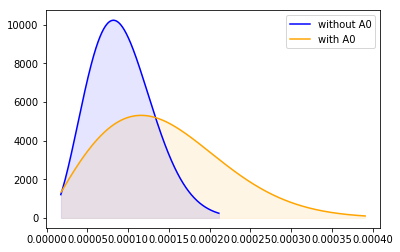

In [13]:
# plotting example with proper density normalisation

# from Bremerhaven Bruker data with and without A0 noise difference
# without (center)
N_1 = 2 
sigma_g_1 = 5.8e-5
# with (center)
N_2 = 1.5
sigma_g_2 = sigma_g_1*2

m_1, v_1 = noise_dist(N_1, sigma_g_1, pmin=0.001, pmax=0.99, N_t=1000)
m_2, v_2 = noise_dist(N_2, sigma_g_2, pmin=0.001, pmax=0.99, N_t=1000)

pl.figure()
pl.plot(m_1, v_1/np.trapz(v_1, m_1), label='without A0', color='blue')
pl.fill_between(m_1, np.zeros_like(v_1), v_1/np.trapz(v_1, m_1), color='blue', alpha=0.1)
pl.plot(m_2, v_2/np.trapz(v_2, m_2), label='with A0', color='orange')
pl.fill_between(m_2, np.zeros_like(v_2), v_2/np.trapz(v_2, m_2), color='orange', alpha=0.1)
pl.legend()
pl.title('Both distributions')
pl.show()

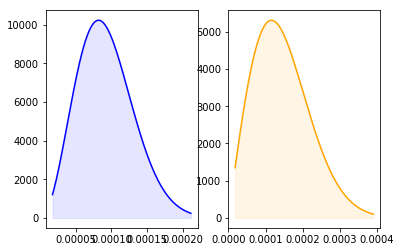

In [14]:
pl.figure()
pl.subplot(1,2,1)
pl.plot(m_1, v_1/np.trapz(v_1, m_1), label='without A0', color='blue')
pl.fill_between(m_1, np.zeros_like(v_1), v_1/np.trapz(v_1, m_1), color='blue', alpha=0.1)
pl.subplot(1,2,2)
pl.plot(m_2, v_2/np.trapz(v_2, m_2), label='with A0', color='orange')
pl.fill_between(m_2, np.zeros_like(v_2), v_2/np.trapz(v_2, m_2), color='orange', alpha=0.1)
pl.show()

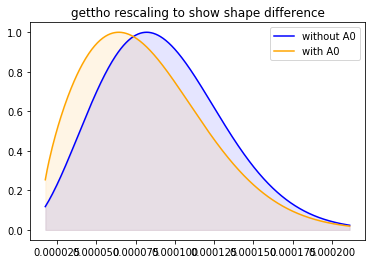

In [21]:
pl.figure()
pl.plot(m_1, v_1/v_1.max(), label='without A0', color='blue')
pl.fill_between(m_1, np.zeros_like(v_1), v_1/v_1.max(), color='blue', alpha=0.1)
pl.plot(m_1, v_2/v_2.max(), label='with A0', color='orange')
pl.fill_between(m_1, np.zeros_like(v_2), v_2/v_2.max(), color='orange', alpha=0.1)
pl.legend()
pl.title('gettho rescaling to show shape difference')
pl.show()